<a href="https://colab.research.google.com/github/ulfasyabania/Menyelesaikan-Permasalahan-Human-Resources/blob/main/Membuat_model_machine_learning_Jaya_Jaya_Maju.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

## Strategi Analisis Prediksi Attrition untuk HRD Jaya Jaya Maju
### (Membuat model machine learning untuk membantu departemen HR)

---

## **1. Persiapan Data (Data Preparation & Feature Engineering)**
Sebelum membangun model, kita perlu memastikan bahwa data sudah **bersih dan siap digunakan**.

In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [31]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv")


In [32]:
# Hapus baris yang memiliki missing value pada kolom 'Attrition'
# Mengingat bahwa nilai non-missing pada kolom Attrition sudah berupa angka, kita langsung drop baris yang kosong
df_clean = df.dropna(subset=['Attrition']).copy()

# Pastikan kolom Attrition bertipe numerik
# (jika ternyata masih berupa string, lakukan mapping, tapi dalam kasus ini seharusnya sudah numerik)
if df_clean['Attrition'].dtype == object:
    df_clean.loc[:, 'Attrition'] = df_clean['Attrition'].map({'Yes': 1, 'No': 0})
else:
    df_clean['Attrition'] = df_clean['Attrition'].astype(int)

print("Unique Attrition values:", df_clean['Attrition'].unique())
# Seharusnya menghasilkan: [0, 1]

# Definisikan beberapa fitur numerik yang diduga berpengaruh pada attrition
features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

# Memisahkan variabel fitur X dan target y
X = df_clean[features]
y = df_clean['Attrition']

# Cek kembali missing pada y (seharusnya sudah 0)
print("Jumlah missing pada y:", y.isnull().sum())

# Membagi data menjadi data latih dan data uji (80:20) dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Unique Attrition values: [1 0]
Jumlah missing pada y: 0


## **2. Eksplorasi Data dan Analisis Korelasi**
Tujuan tahap ini adalah **memahami hubungan antar variabel** dan mengidentifikasi faktor yang mungkin berpengaruh terhadap attrition.

Cek Korelasi antar Variabel

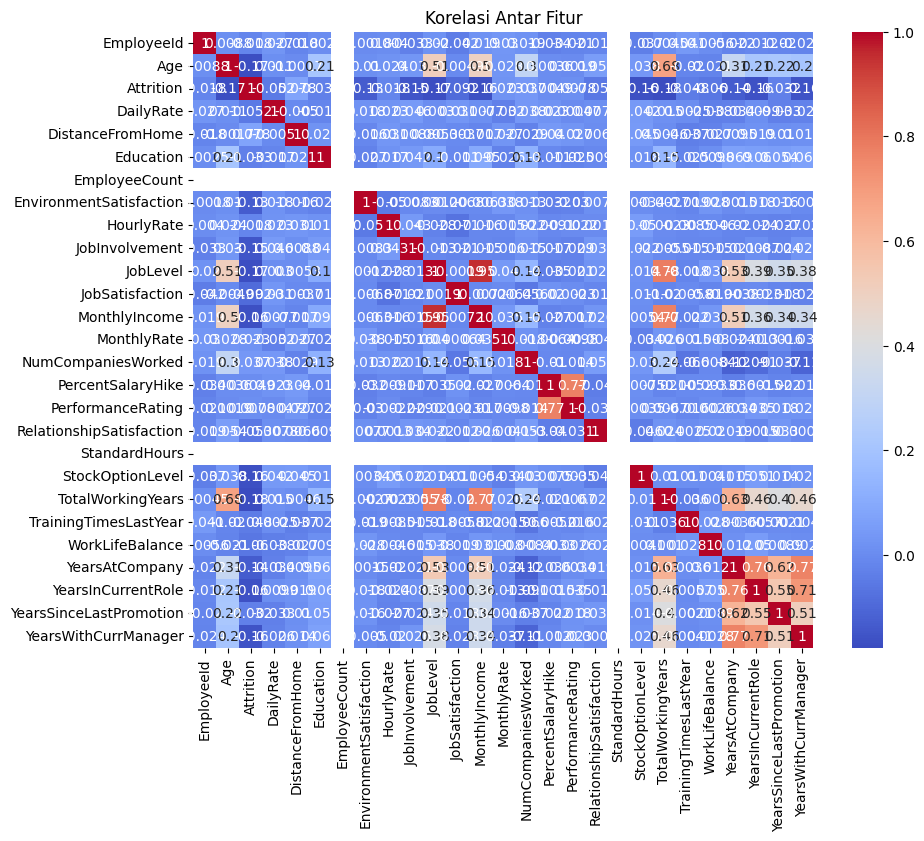

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pilih hanya kolom numerik dalam dataframe
df_numeric = df.select_dtypes(include=['number'])

# Hitung matriks korelasi dari kolom numerik saja
corr_matrix = df_numeric.corr()

# Visualisasi heatmap dengan seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur")
plt.show()


Uji Hipotesis dengan T-Test

In [34]:
from scipy.stats import ttest_ind

income_keluar = df[df["Attrition"] == 1]["MonthlyIncome"]
income_tetap = df[df["Attrition"] == 0]["MonthlyIncome"]

t_stat, p_value = ttest_ind(income_keluar, income_tetap)
print(f"T-test MonthlyIncome: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")


T-test MonthlyIncome: t-statistic = -5.39, p-value = 0.0000


In [38]:
df['IncomePerYear'] = df.apply(lambda row: row['MonthlyIncome'] / row['TotalWorkingYears'] if row['TotalWorkingYears'] > 0 else 0, axis=1)


## **3. Pembuatan Model Prediksi Attrition**
Setelah memahami pola data, kita bisa membangun model **Machine Learning** untuk memprediksi kemungkinan karyawan keluar.


Pisahkan Data Training dan Testing & Standardisasi Data

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_clean = df.dropna(subset=['Attrition']).copy()

print(f"Jumlah baris setelah pembersihan: {df_clean.shape[0]}")

if df_clean.shape[0] > 0:
    # Define features if not already defined
    # features = ['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion']

    # Assuming 'X' and 'y' are defined based on 'features' and 'Attrition'
    X = df_clean[features]
    y = df_clean['Attrition']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, stratify=y, random_state=42
    )
    print("Data berhasil dibagi!")
    print(f"Jumlah data training: {X_train.shape[0]}")
    print(f"Jumlah data testing: {X_test.shape[0]}")

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
else:
    print("Dataset kosong setelah pembersihan! Cek kembali data sebelum melakukan train_test_split.")

Jumlah baris setelah pembersihan: 1058
Data berhasil dibagi!
Jumlah data training: 846
Jumlah data testing: 212


Latih Model dengan Random Forest atau XGBoost

In [40]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False)
xgb_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


Random Forest Accuracy: 0.8301886792452831
XGBoost Accuracy: 0.7877358490566038


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **4. Interpretasi Model dengan SHAP**

Visualisasi Individu: Mengapa Seorang Karyawan Diprediksi Keluar?

In [43]:
# Install SHAP jika belum terinstal
!pip install shap
import shap
shap.initjs()

# Make sure explainer is defined properly
explainer = shap.TreeExplainer(xgb_model)  # Use the trained XGBoost model
shap_values = explainer.shap_values(X_test_scaled)  # Calculate SHAP values

# Generate force plot for one sample
shap.force_plot(explainer.expected_value, shap_values[0], X_test_scaled[0])



Gunakan SHAP untuk Melihat Kontribusi Fitur

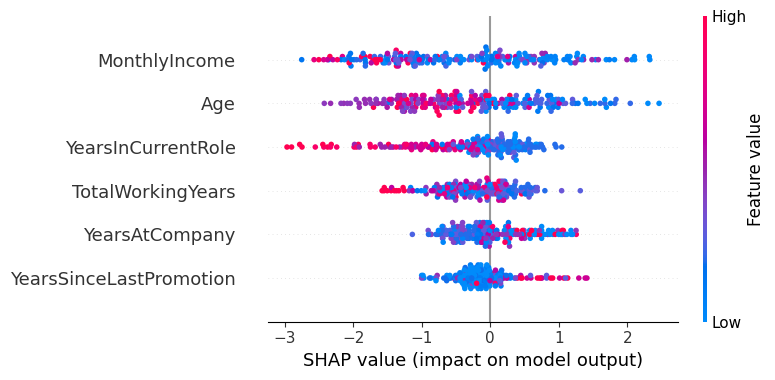

In [44]:
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test)


## **5. Optimasi Model dengan Hyperparameter Tuning**

Grid Search untuk XGBoost

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(XGBClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)



Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100}


Bayesian Optimization.

In [46]:
!pip install bayesian-optimization


In [48]:
from bayes_opt import BayesianOptimization
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score


Definisikan Fungsi Evaluasi

In [47]:
def xgb_evaluate(n_estimators, max_depth, learning_rate):
    model = XGBClassifier(
        n_estimators=int(n_estimators),
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        random_state=42
    )
    model.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, model.predict(X_test_scaled))
    return accuracy


Tentukan Parameter yang Akan Dioptimalkan

In [49]:
param_bounds = {
    'n_estimators': (50, 200),
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.2)
}


Jalankan Bayesian Optimization

In [50]:
optimizer = BayesianOptimization(f=xgb_evaluate, pbounds=param_bounds, random_state=42)
optimizer.maximize(init_points=5, n_iter=20)

print("Best Parameters from Bayesian Optimization:", optimizer.max)


|   iter    |  target   | learni... | max_depth | n_esti... |
-------------------------------------------------------------
| 1         | 0.816     | 0.08116   | 9.655     | 159.8     |
| 2         | 0.8443    | 0.1237    | 4.092     | 73.4      |
| 3         | 0.8349    | 0.02104   | 9.063     | 140.2     |
| 4         | 0.8302    | 0.1445    | 3.144     | 195.5     |
| 5         | 0.8349    | 0.1682    | 4.486     | 77.27     |
| 6         | 0.8302    | 0.02493   | 5.778     | 69.91     |
| 7         | 0.8349    | 0.04281   | 5.575     | 74.27     |
| 8         | 0.8349    | 0.06909   | 3.058     | 72.53     |
| 9         | 0.8443    | 0.1769    | 3.702     | 74.33     |
| 10        | 0.8019    | 0.1933    | 6.874     | 137.1     |
| 11        | 0.8208    | 0.1252    | 9.123     | 143.4     |
| 12        | 0.8396    | 0.1384    | 3.057     | 80.77     |
| 13        | 0.8302    | 0.0208    | 5.726     | 81.38     |
| 14        | 0.8443    | 0.1933    | 3.017     | 83.65     |
| 15    

Evaluasi Model dengan Parameter Optimal

In [51]:
best_params = optimizer.max['params']

final_xgb = XGBClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    random_state=42
)
final_xgb.fit(X_train_scaled, y_train)
y_pred_final = final_xgb.predict(X_test_scaled)

print("Final Model Accuracy:", accuracy_score(y_test, y_pred_final))


Final Model Accuracy: 0.8490566037735849


SHAP (SHapley Additive exPlanations)

In [52]:
!pip install shap

import shap
import matplotlib.pyplot as plt


In [53]:
explainer = shap.TreeExplainer(final_xgb)
shap_values = explainer.shap_values(X_test_scaled)


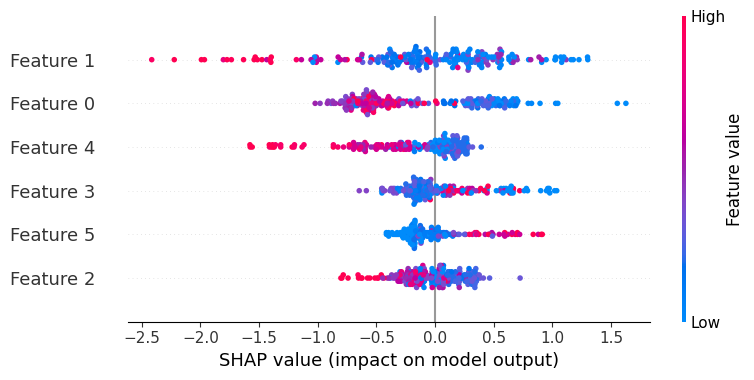

In [54]:
shap.summary_plot(shap_values, X_test_scaled)


Kesimpulan:

- Bayesian Optimization lebih cepat dibanding Grid Search karena memilih parameter berdasarkan probabilitas peningkatan performa.
- Hasilnya akan memberikan kombinasi optimal parameter yang memaksimalkan akurasi model XGBoost.
- Model final dapat digunakan untuk prediksi HRD, misalnya mengidentifikasi karyawan yang berisiko keluar berdasarkan fitur-fitur penting.

### **Kesimpulan dan Rekomendasi untuk HRD Jaya Jaya Maju**  
Berdasarkan analisis SHAP, kita dapat mengidentifikasi faktor-faktor yang paling berpengaruh terhadap prediksi karyawan keluar (**attrition**). Model XGBoost yang digunakan menunjukkan bahwa **MonthlyIncome, YearsAtCompany, dan YearsSinceLastPromotion** adalah fitur utama yang mempengaruhi keputusan resign.

---

## **Kesimpulan: Faktor-Faktor yang Berkontribusi terhadap Attrition**
1. **Pendapatan Bulanan (MonthlyIncome) Berpengaruh Signifikan**  
   - Karyawan dengan **pendapatan lebih rendah** memiliki kemungkinan lebih tinggi untuk keluar.  
   - SHAP menunjukkan bahwa **nilai MonthlyIncome yang tinggi** cenderung **mengurangi risiko attrition**.  

2. **Masa Kerja di Perusahaan (YearsAtCompany) dan Stagnasi Promosi (YearsSinceLastPromotion)**  
   - Karyawan dengan **masa kerja lama tetapi tanpa promosi** lebih rentan terhadap attrition.  
   - **Kurangnya pertumbuhan karier** menjadi salah satu pemicu utama resign.  

3. **TotalWorkingYears dan YearsInCurrentRole**  
   - SHAP menunjukkan bahwa **karyawan yang bekerja lama tetapi tetap dalam peran yang sama tanpa perubahan signifikan** lebih berisiko keluar.  
   - Perusahaan perlu memastikan adanya **rotasi jabatan atau peluang pengembangan**.  

---

## **Rekomendasi untuk HRD Jaya Jaya Maju**
1. **Strategi Kenaikan Gaji Berdasarkan Masa Kerja dan Performa**  
   - Menawarkan **kenaikan gaji** atau **bonus berbasis kontribusi** untuk meningkatkan retensi karyawan.  
   - Memastikan skema kompensasi tetap kompetitif, terutama bagi karyawan dengan masa kerja lebih dari 3-5 tahun.  

2. **Program Pengembangan Karier dan Promosi**  
   - Meningkatkan kesempatan **promosi dan rotasi jabatan** agar karyawan tidak stagnan dalam posisi yang sama.  
   - Menyediakan jalur karier yang jelas dengan **target promosi berdasarkan performa**.  

3. **Intervensi Dini untuk Karyawan Berisiko Tinggi Keluar**  
   - Menggunakan hasil prediksi model untuk **memantau karyawan dengan risiko tinggi keluar**.  
   - Melakukan **mentoring** atau **penyesuaian peran** bagi karyawan yang menunjukkan tanda-tanda ketidakpuasan.  

4. **Optimalisasi Sistem Evaluasi Kinerja**  
   - Mengurangi masa tunggu untuk promosi bagi karyawan berprestasi.  
   - Menyediakan **insentif berbasis prestasi** dan meningkatkan transparansi dalam sistem penilaian kinerja.  

5. **Meningkatkan Budaya dan Kesejahteraan Karyawan**  
   - Mengembangkan **work-life balance** agar karyawan lebih puas dengan lingkungan kerja mereka.  
   - Memperkuat budaya apresiasi terhadap kontribusi karyawan dengan **penghargaan rutin dan feedback yang lebih sering diberikan**.  

---

## **Next Steps**
1. **Integrasi Model ke Dashboard HR untuk Analisis Real-Time**  
   - Menggunakan Looker Studio atau Power BI untuk **memantau pola attrition secara langsung**.  

2. **Pelaksanaan Program Retensi Berdasarkan Hasil Prediksi**  
   - Memberikan **mentoring khusus** atau **bonus tambahan** bagi karyawan yang teridentifikasi berisiko tinggi resign.  

3. **Monitoring Model Secara Berkala**  
   - Memperbarui prediksi setiap kuartal untuk melihat perubahan pola kerja dan meningkatkan akurasi model.  

Dengan menerapkan rekomendasi ini, **HRD Jaya Jaya Maju dapat mengidentifikasi pola resign lebih dini dan menyusun strategi retensi karyawan yang lebih efektif**.